**About the Notebook:**

In this Kaggle python notebook, let us try to dive deep into the results of one of the most comprehensive data science and machine learning surveys conducted by Kaggle and try to understand them better along the way using visuals.


**About this survey:**

* This survey received 19,717 usable respondents from 171 countries and territories. If a country or territory received less than 50 respondents, we grouped them into a group named “Other” for anonymity.
* Most of our respondents were found primarily through Kaggle channels, like our email list, discussion forums and social media channels.
* The survey was live from October 8th to October 28th. We allowed respondents to complete the survey at any time during that window. The median response time for those who participated in the survey was approximately 10 minutes.
* Not every question was shown to every respondent. You can learn more about the different segments we used in the survey_schema.csv file. In general, respondents with more experience were asked more questions and respondents with less experience were asked less questions.

## Let us now get into the findings.!

## List of dataset files available

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv
/kaggle/input/kaggle-survey-2019/questions_only.csv
/kaggle/input/kaggle-survey-2019/survey_schema.csv
/kaggle/input/kaggle-survey-2019/other_text_responses.csv


In [2]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

In [3]:
multiple_choice_df = pd.read_csv('/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv')
questions_df = pd.read_csv('/kaggle/input/kaggle-survey-2019/questions_only.csv')
survey_schema_df = pd.read_csv('/kaggle/input/kaggle-survey-2019/survey_schema.csv')
text_res_df = pd.read_csv('/kaggle/input/kaggle-survey-2019/other_text_responses.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Glimpse of Kaggle Survey dataset
Let's see the overview of given dataset

In [4]:
print (f'Shape of multiple choice responses: {multiple_choice_df.shape}')
print (f'Shape of questions only: {questions_df.shape}')
print (f'Shape of survey schema: {survey_schema_df.shape}')
print (f'Shape of text responses: {text_res_df.shape}')

Shape of multiple choice responses: (19718, 246)
Shape of questions only: (1, 35)
Shape of survey schema: (10, 36)
Shape of text responses: (19718, 28)


### Description of each file given above:

1. **multiple_choice_responses.csv**: Multiple choice single response questions fit into individual columns whereas multiple choice multiple response questions were split into multiple columns. Text responses were encoded to protect user privacy and countries with fewer than 50 respondents were grouped into the category "other".

2. **questions_only.csv**: The list of questions from the 2019 Kaggle Data Science and Machine Learning Survey 

3. **survey_schema**: Survey schema describing which questions were presented to which respondents. In general, respondents with more experience were asked more questions than respondents with less experience.

4. **text_res_df**: If "Other" is selected in any of the question, there is also an option to provide a free form text response. These text responses were separated and shuffled to protect user privacy.

In [5]:
multiple_choice_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [6]:
questions_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...


In [7]:
survey_schema_df.head()

,2019 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q32,Q33,Q34,Q4,Q5,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your age (# years)?,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Duration (in seconds)
1,# of Respondents:,19679,12465,12218,16745,16533,15654,15591,14592,14408,...,7030,6995,6974,19285,19070,13969,13591,13195,9202,19679
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selected,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0


In [8]:
text_res_df.head()

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,What is your gender? - Prefer to self-describe...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Select the title most similar to your current ...,Select any activities that make up an importan...
1,"""><script src=https://abels.xss.ht></script>",NaN,NaN,Sheets,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""><script src=https://abels.xss.ht></script>"
2,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### List of asked questions in the survey

In [9]:
from IPython.display import Markdown, display
for index, value in questions_df.iloc[0].items():
    display(Markdown(f'**{index}:** {value}'))

**Time from Start to Finish (seconds):** Duration (in seconds)

**Q1:** What is your age (# years)?

**Q2:** What is your gender? - Selected Choice

**Q3:** In which country do you currently reside?

**Q4:** What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

**Q5:** Select the title most similar to your current role (or most recent title if retired): - Selected Choice

**Q6:** What is the size of the company where you are employed?

**Q7:** Approximately how many individuals are responsible for data science workloads at your place of business?

**Q8:** Does your current employer incorporate machine learning methods into their business?

**Q9:** Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice

**Q10:** What is your current yearly compensation (approximate $USD)?

**Q11:** Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

**Q12:** Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice

**Q13:** On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice

**Q14:** What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

**Q15:** How long have you been writing code to analyze data (at work or at school)?

**Q16:** Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q17:** Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q18:** What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice

**Q19:** What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

**Q20:** What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q21:** Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q22:** Have you ever used a TPU (tensor processing unit)?

**Q23:** For how many years have you used machine learning methods?

**Q24:** Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice

**Q25:** Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q26:** Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q27:** Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q28:** Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice

**Q29:** Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice

**Q30:** Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice

**Q31:** Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice

**Q32:** Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice

**Q33:** Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q34:** Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice

## Exploratory Data Analysis
Let's explore the Kaggle survey data based on different features using some visulizations.

### # of respondents for all the questions

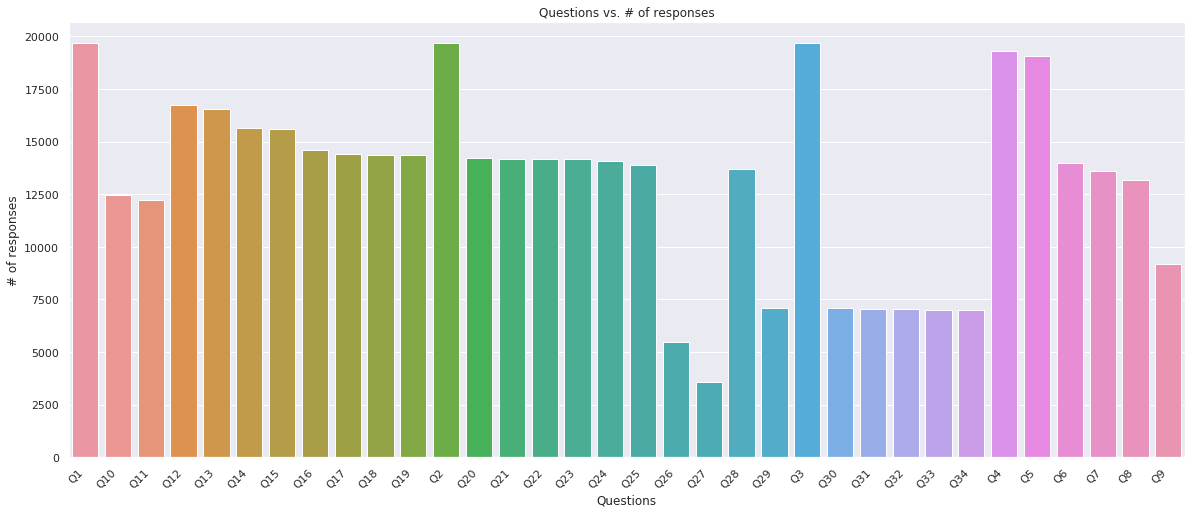

In [10]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(style="darkgrid")
ax = sns.barplot(survey_schema_df.columns.values[1:][:-1], survey_schema_df.iloc[1][1:].astype('int64')[:-1])
ax.set(xlabel='Questions', ylabel='# of responses', title='Questions vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

### Age group wise response distribution

#### Question 1: What is your age (# of years)?

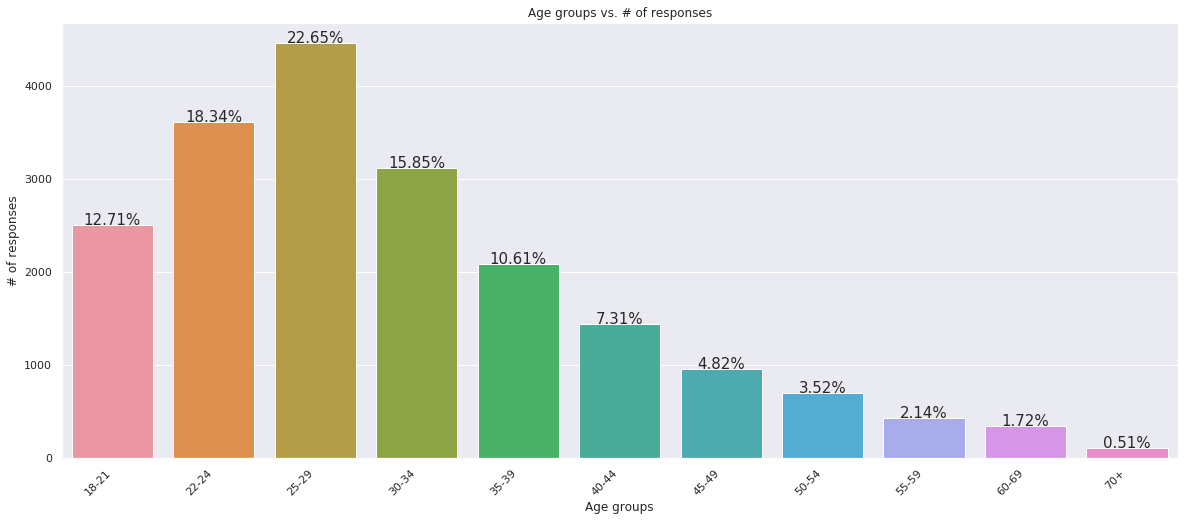

In [11]:
total = int(survey_schema_df.iloc[1]['Q1'])
ax = sns.barplot(multiple_choice_df.groupby(['Q1']).size().reset_index(name='counts')['Q1'][:-1], multiple_choice_df.groupby(['Q1']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Age groups', ylabel='# of responses', title='Age groups vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

plt.show()

It looks like most of the respondents are in age group 25-29.

### Gender wise response distribution 

#### Question 2: What is your gender?

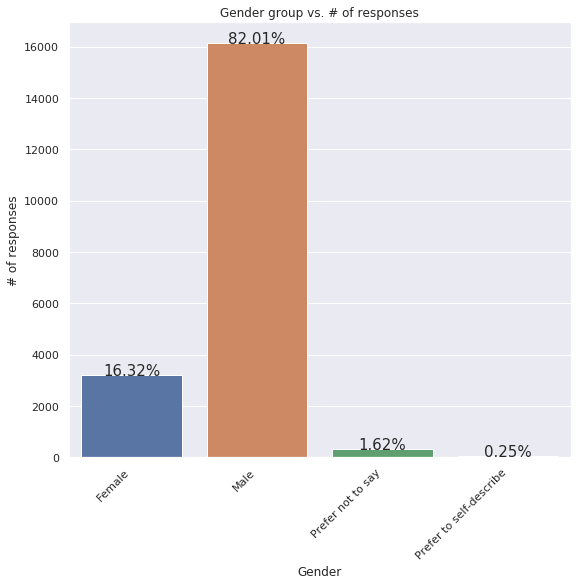

In [12]:
sns.set(rc={'figure.figsize':(9,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q2'])
ax = sns.barplot(multiple_choice_df.groupby(['Q2']).size().reset_index(name='counts')['Q2'][:-1], multiple_choice_df.groupby(['Q2']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Gender', ylabel='# of responses', title='Gender group vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

Most of the respondents are Male

### Country wise response distribution 

#### Question 3: In which country do you currently reside?

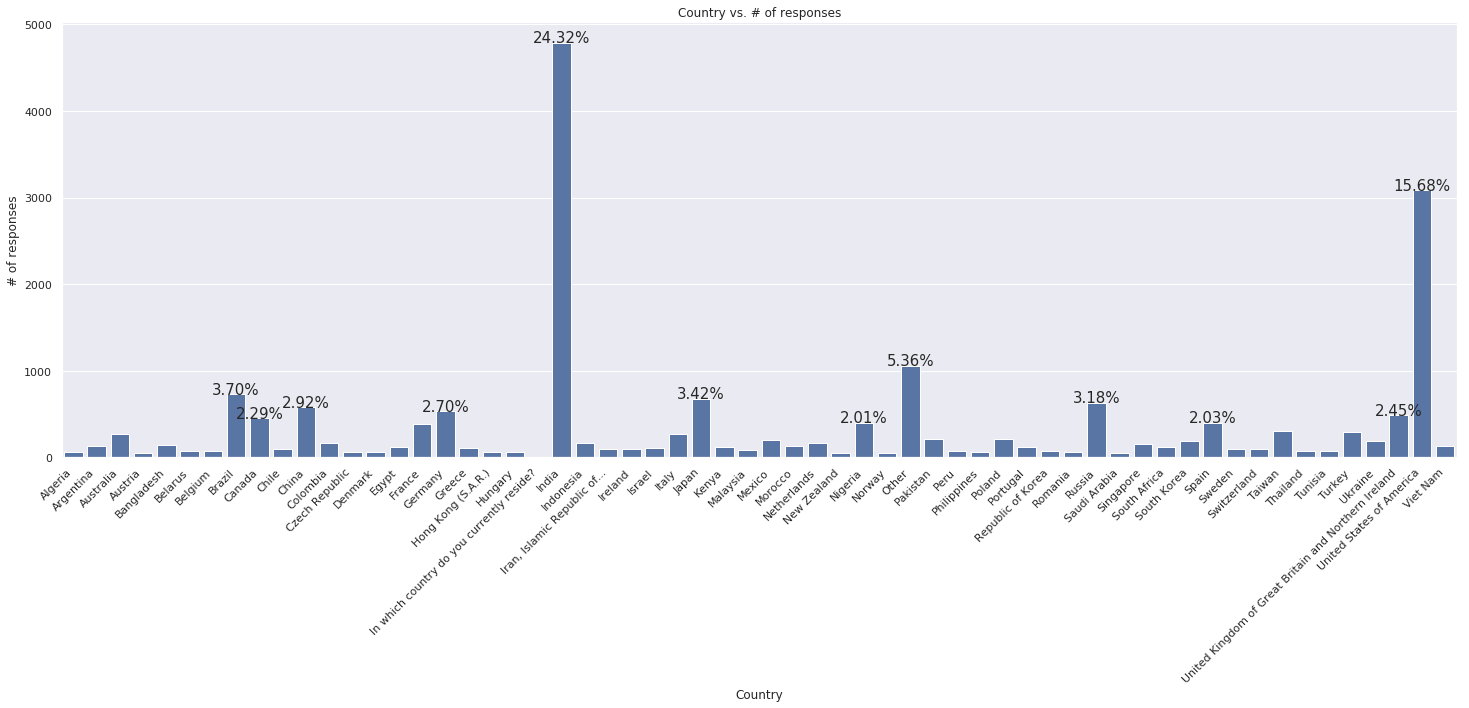

In [13]:
sns.set(rc={'figure.figsize':(25,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q3'])
ax = sns.barplot(multiple_choice_df.groupby(['Q3']).size().reset_index(name='counts')['Q3'], multiple_choice_df.groupby(['Q3']).size().reset_index(name='counts')['counts'], color='b')
ax.set(xlabel='Country', ylabel='# of responses', title='Country vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    if height/total*100 > 2: # Only plot the % if it's more than 2% in this case
        ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

Majority responses are from India (24.32%) and USA (15.68%).

### Distribution of Educational background

#### Question 4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

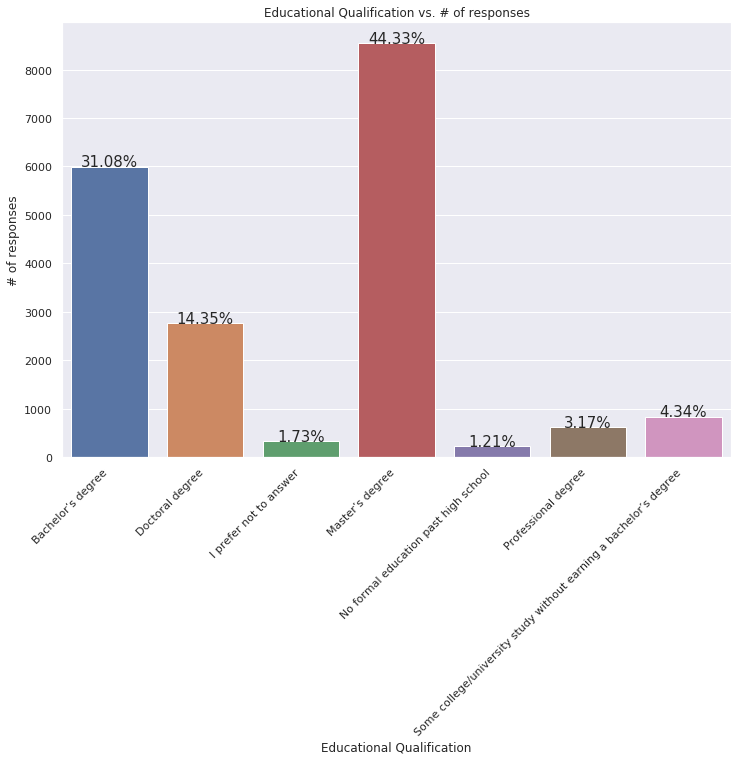

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q4'])
ax = sns.barplot(multiple_choice_df.groupby(['Q4']).size().reset_index(name='counts')['Q4'][:-1], multiple_choice_df.groupby(['Q4']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Educational Qualification', ylabel='# of responses', title='Educational Qualification vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

There are ~44% respondents are attaining or will attain master's degree,

### Responsibility/Current Role wise distribution

#### Question 5: Select the title most similar to your current role (or most recent title if retired).

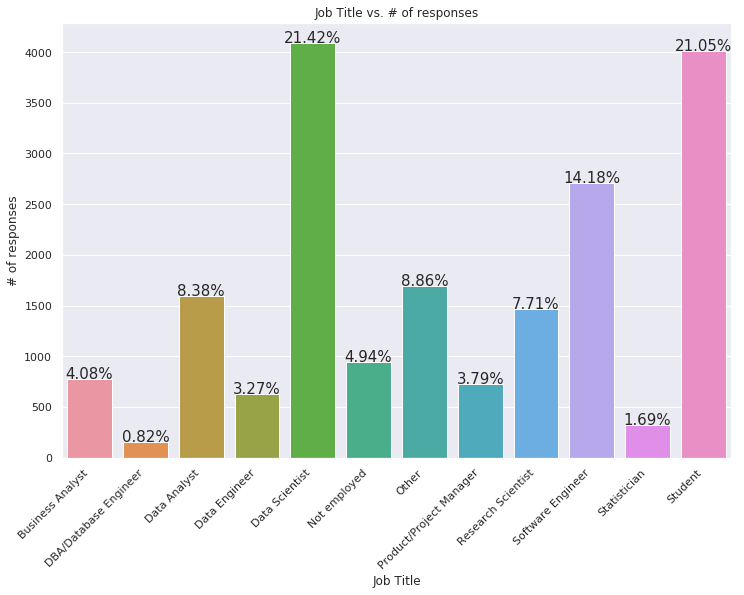

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q5'])
ax = sns.barplot(multiple_choice_df.groupby(['Q5']).size().reset_index(name='counts')['Q5'].drop(9, axis=0), multiple_choice_df.groupby(['Q5']).size().reset_index(name='counts')['counts'].drop(9, axis=0))
ax.set(xlabel='Job Title', ylabel='# of responses', title='Job Title vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

Most of the respondents are either students or data scientists.

### Distribution of company size of respondents

#### Question 6: What is the size of the company where you are employed?

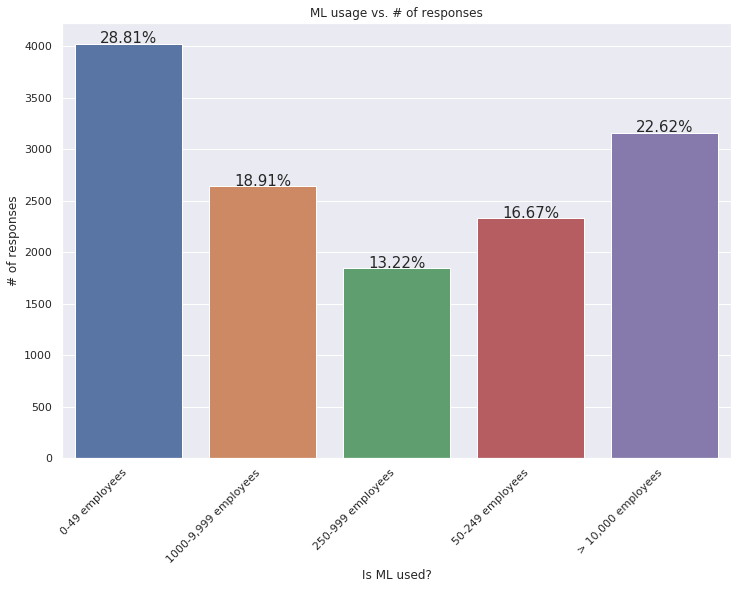

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q6'])
ax = sns.barplot(multiple_choice_df.groupby(['Q6']).size().reset_index(name='counts')['Q6'][:-1], multiple_choice_df.groupby(['Q6']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Is ML used?', ylabel='# of responses', title='ML usage vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

Majority of companies are of size 0-49 employees. This indicates possibility startups.

### Distribution of number of individuals working on ML/DS

#### Question 7: Approximately how many individuals are responsible for data science workloads at your place of business?

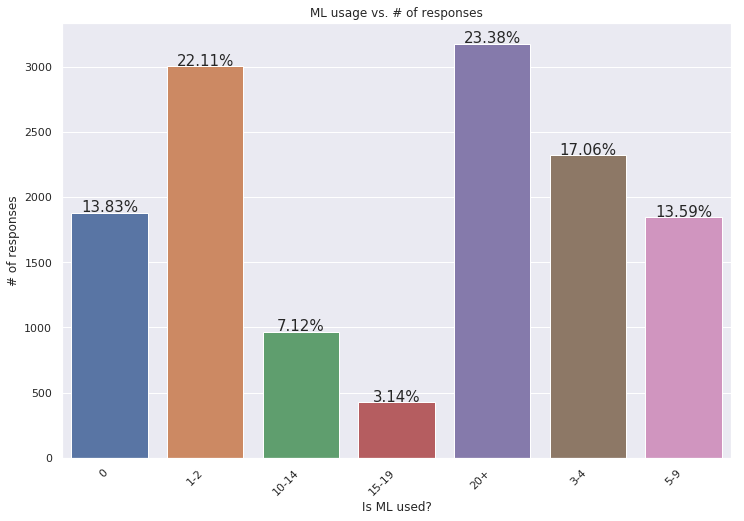

In [17]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q7'])
ax = sns.barplot(multiple_choice_df.groupby(['Q7']).size().reset_index(name='counts')['Q7'][:-1], multiple_choice_df.groupby(['Q7']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Is ML used?', ylabel='# of responses', title='ML usage vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

### Question 8: Does your current employer incorporate machine learning methods into their business?

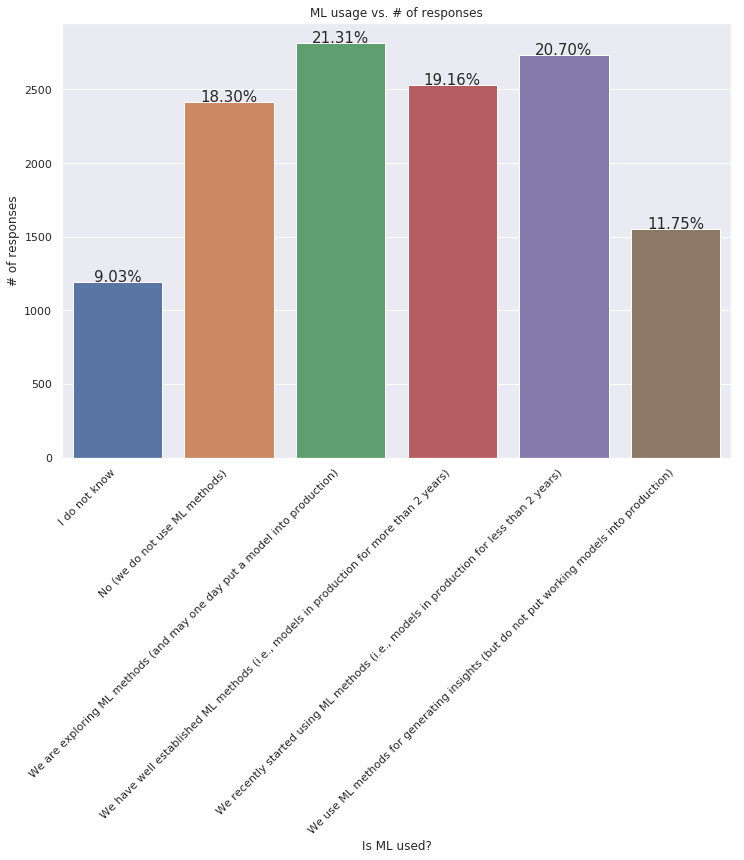

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q8'])
ax = sns.barplot(multiple_choice_df.groupby(['Q8']).size().reset_index(name='counts')['Q8'][1:], multiple_choice_df.groupby(['Q8']).size().reset_index(name='counts')['counts'][1:])
ax.set(xlabel='Is ML used?', ylabel='# of responses', title='ML usage vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

### Distribution of compensation of respondents

#### Question 10: What is your current yearly compensation (approximate $USD)?

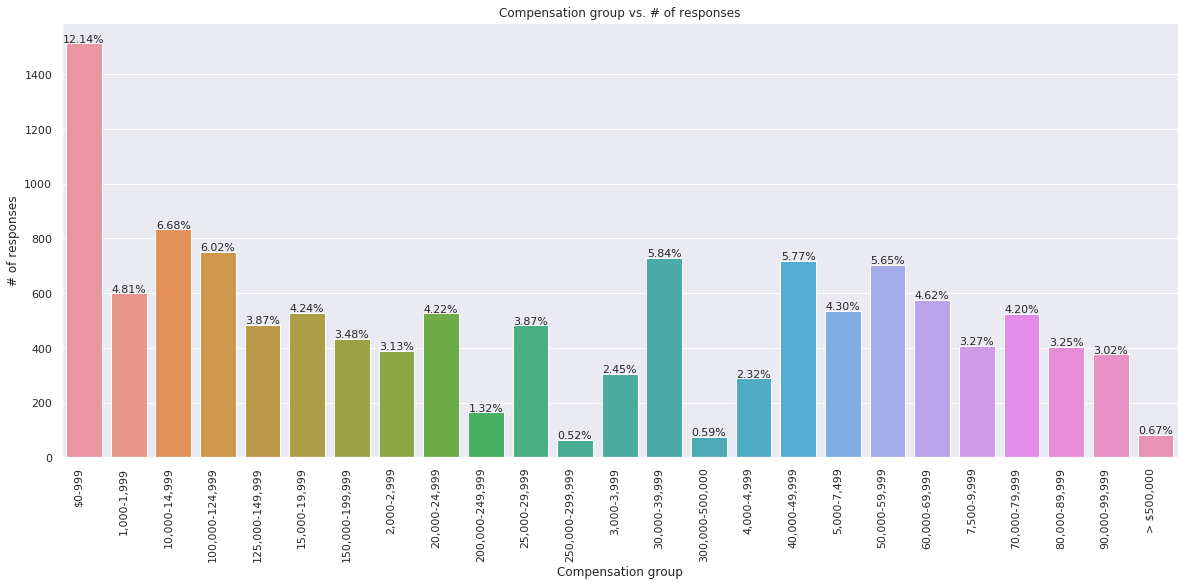

In [19]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q10'])
ax = sns.barplot(multiple_choice_df.groupby(['Q10']).size().reset_index(name='counts')['Q10'][:-1], multiple_choice_df.groupby(['Q10']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Compensation group', ylabel='# of responses', title='Compensation group vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=11) 
plt.show()

### Distribution of amout spent ($ USD) on ML/DS

#### Question 11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

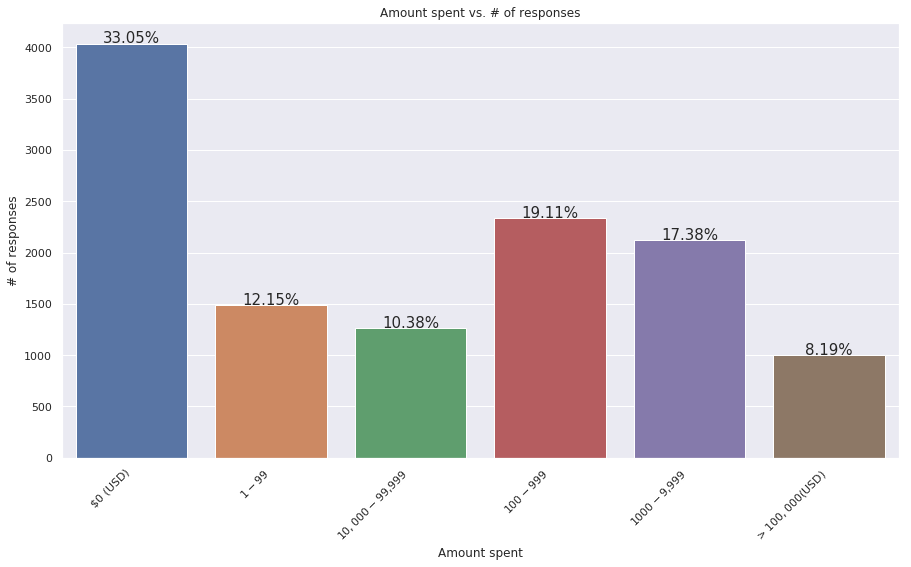

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q11'])
ax = sns.barplot(multiple_choice_df.groupby(['Q11']).size().reset_index(name='counts')['Q11'][:-1], multiple_choice_df.groupby(['Q11']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Amount spent', ylabel='# of responses', title='Amount spent vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

It looks like majority of respondents (~33.05%) do not spent any $$$ on ML/CC products at work.

### Question 15: How long have you been writing code to analyze data (at work or at school)?

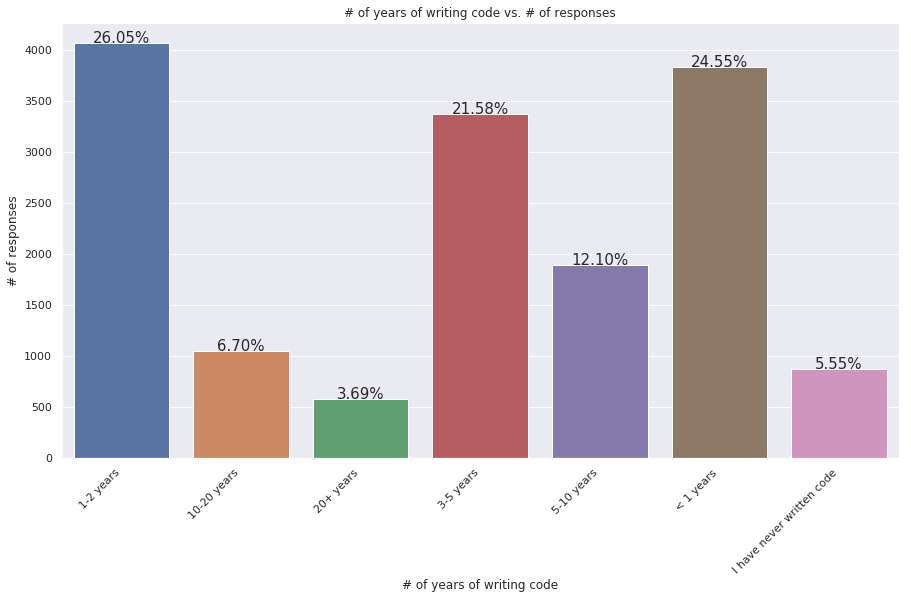

In [21]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q15'])
ax = sns.barplot(multiple_choice_df.groupby(['Q15']).size().reset_index(name='counts')['Q15'].drop(6, axis=0), multiple_choice_df.groupby(['Q15']).size().reset_index(name='counts')['counts'].drop(6, axis=0))
ax.set(xlabel='# of years of writing code', ylabel='# of responses', title='# of years of writing code vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

Majority of respondents are writing code since 1-2 years.

### Question 19: What programming language would you recommend an aspiring data scientist to learn first?

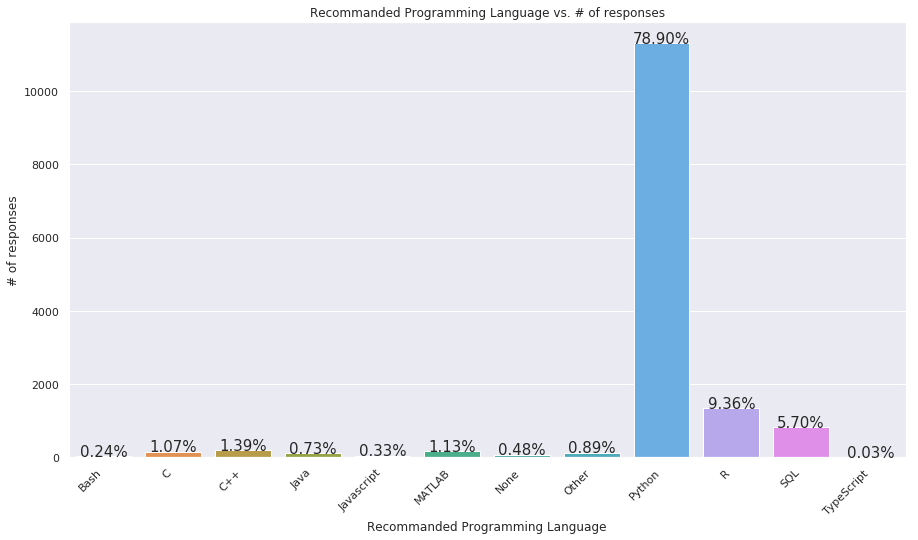

In [22]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q19'])
ax = sns.barplot(multiple_choice_df.groupby(['Q19']).size().reset_index(name='counts')['Q19'][:-1], multiple_choice_df.groupby(['Q19']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='Recommanded Programming Language', ylabel='# of responses', title='Recommanded Programming Language vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

Python is the most recommanded programming language to learn for aspiring data scientists.

### Question 22: Have you ever used a TPU (tensor processing unit)?

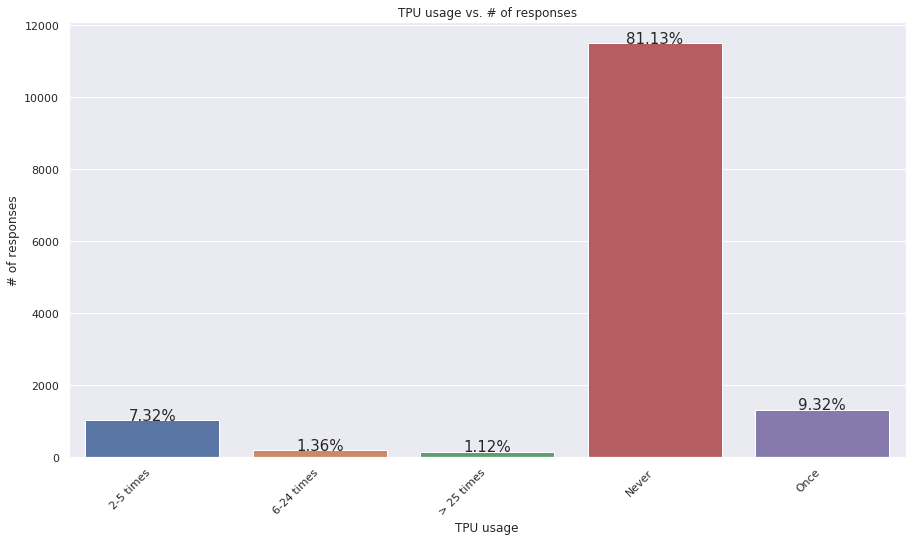

In [23]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q22'])
ax = sns.barplot(multiple_choice_df.groupby(['Q22']).size().reset_index(name='counts')['Q22'].drop(3, axis=0), multiple_choice_df.groupby(['Q22']).size().reset_index(name='counts')['counts'].drop(3, axis=0))
ax.set(xlabel='TPU usage', ylabel='# of responses', title='TPU usage vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

More than 81% respondents have never used TPU.

### Question 23: For how many years have you used machine learning methods?

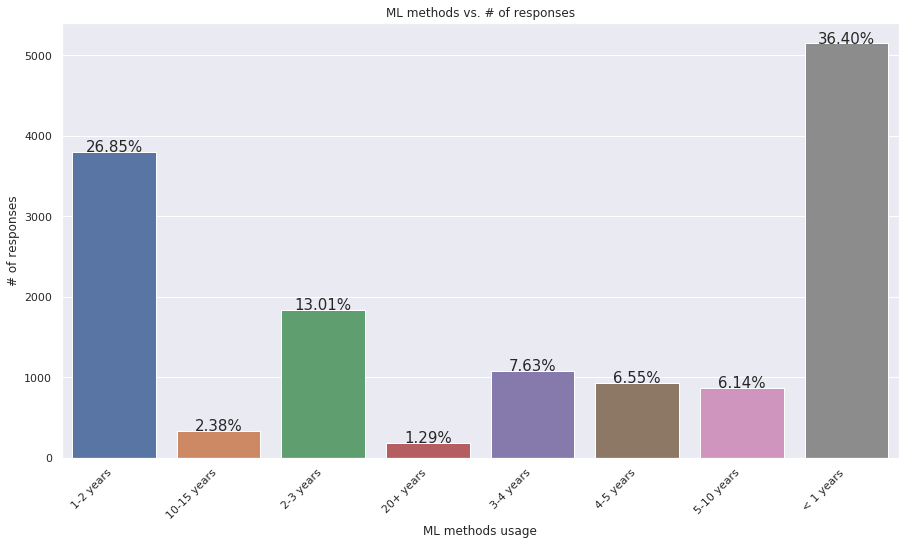

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="darkgrid")

total = int(survey_schema_df.iloc[1]['Q23'])
ax = sns.barplot(multiple_choice_df.groupby(['Q23']).size().reset_index(name='counts')['Q23'][:-1], multiple_choice_df.groupby(['Q23']).size().reset_index(name='counts')['counts'][:-1])
ax.set(xlabel='ML methods usage', ylabel='# of responses', title='ML methods vs. # of responses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches: # loop to all objects and plot group wise % distribution
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

Most of the respondents are working in ML/DS methods since less than 1 year.

## Exploring questions with multiple choices and their response behavior

In this survey, there were many questions with multiple choices. Where respondent can select one or more options for a certain question. Responses of such questions are recorded as separate columns in the dataset. Let's first analyse the columns of `multiple_choice_responses.csv`.

In [25]:
multiple_choice_df.columns.values

array(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7', 'Q8', 'Q9_Part_1',
       'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
       'Q9_Part_7', 'Q9_Part_8', 'Q9_OTHER_TEXT', 'Q10', 'Q11',
       'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_Part_6', 'Q12_Part_7', 'Q12_Part_8',
       'Q12_Part_9', 'Q12_Part_10', 'Q12_Part_11', 'Q12_Part_12',
       'Q12_OTHER_TEXT', 'Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3',
       'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 'Q13_Part_7',
       'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_11',
       'Q13_Part_12', 'Q13_OTHER_TEXT', 'Q14', 'Q14_Part_1_TEXT',
       'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT',
       'Q14_Part_5_TEXT', 'Q14_OTHER_TEXT', 'Q15', 'Q16_Part_1',
       'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5',
       'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9',
       '

In [26]:
def plot_multi_choice_dist(question, number_of_parts, xlabel, ylabel):
    sns.set(rc={'figure.figsize':(15,8)})
    sns.set(style="darkgrid")

    cats, counts = [], []
    total = int(survey_schema_df.iloc[1][question])

    for i in range(number_of_parts):
        cats.append(multiple_choice_df[multiple_choice_df[f'{question}_Part_{i+1}'].notnull()][f'{question}_Part_{i+1}'][1:].unique()[0])
        counts.append(int(multiple_choice_df[multiple_choice_df[f'{question}_Part_{i+1}'].notnull()][f'{question}_Part_{i+1}'].shape[0]))
    ax = sns.barplot(cats, counts)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=f'{xlabel} vs. {ylabel}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches: # loop to all objects and plot group wise % distribution
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 5,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=15) 
    return plt

### Responsibility distribution at workplace

### Question 9: Select any activities that make up an important part of your role at work: (Select all that apply)

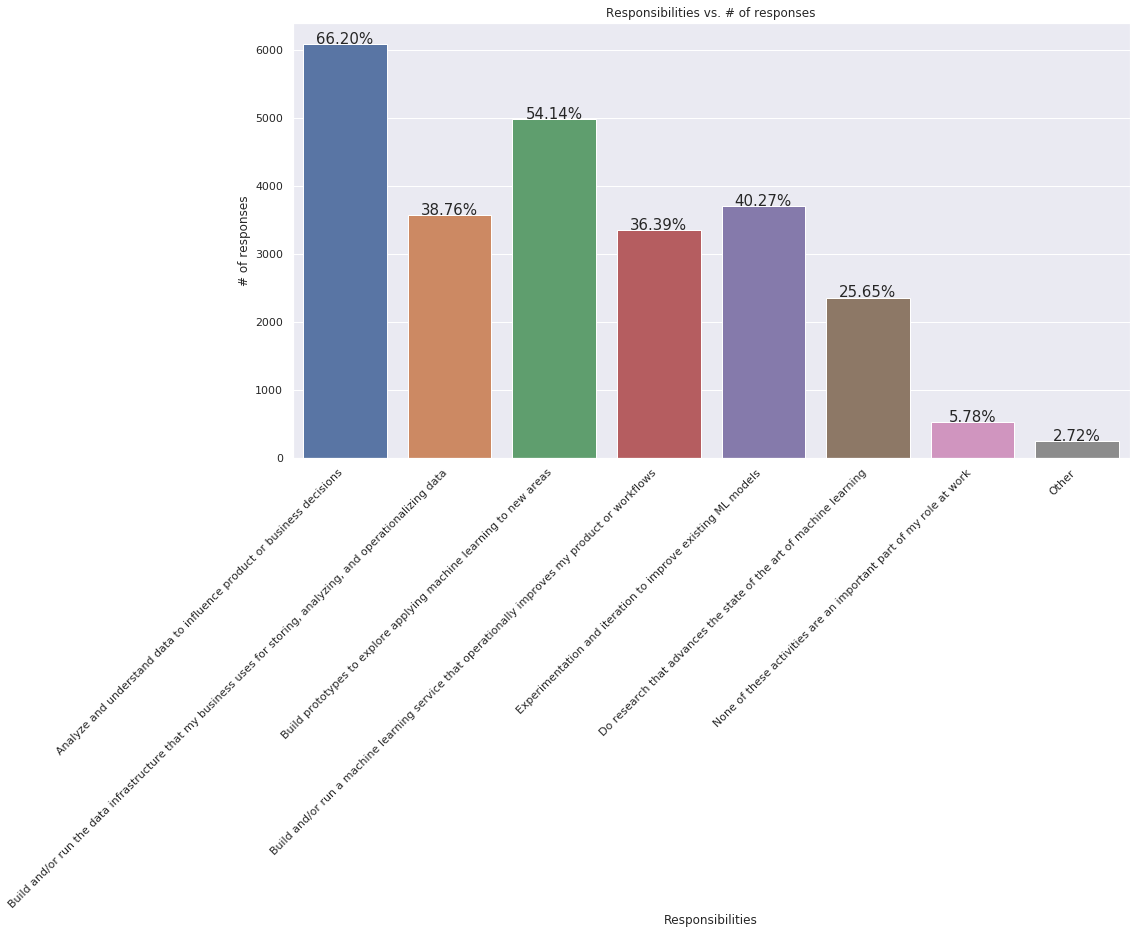

In [27]:
plot_multi_choice_dist('Q9', 8, 'Responsibilities', '# of responses').show()

### Distribution of learning sources

#### Questions 12: Who/what are your favorite media sources that report on data science topics? (Select all that apply)

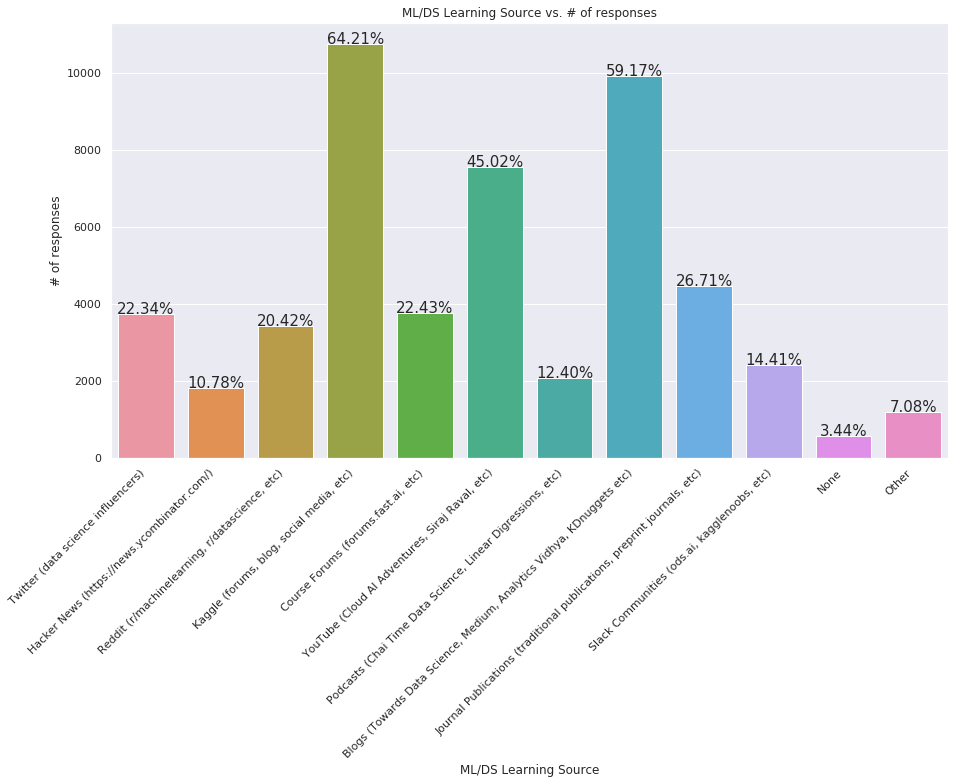

In [28]:
plot_multi_choice_dist('Q12', 12, 'ML/DS Learning Source', '# of responses').show()

### Distribution of learning platforms

### Question 13: On which platforms have you begun or completed data science courses? (Select all that apply).

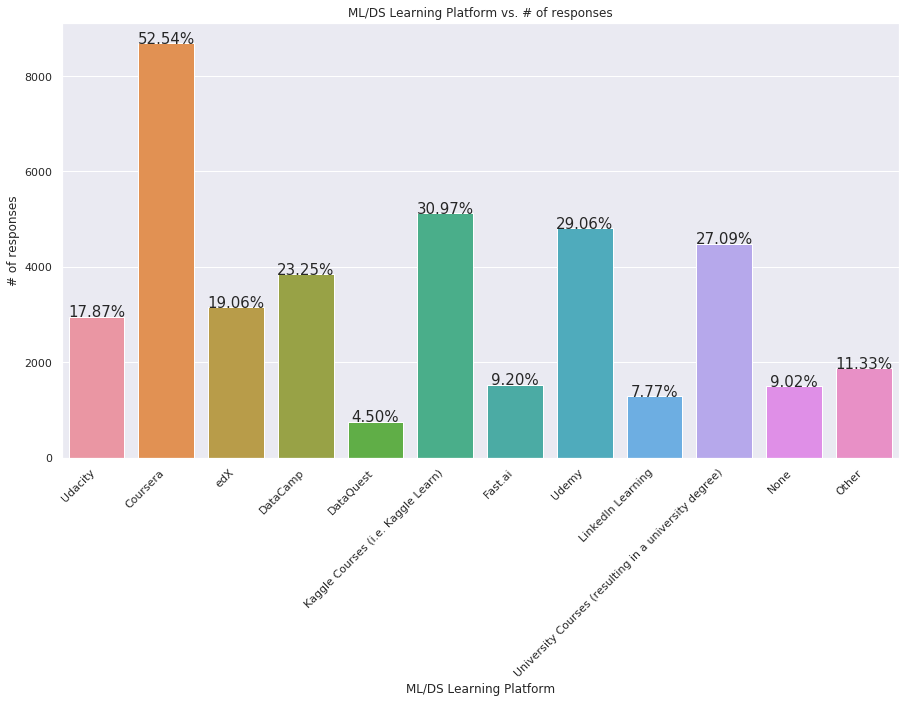

In [29]:
plot_multi_choice_dist('Q13', 12, 'ML/DS Learning Platform', '# of responses').show()

Coursera looks the most used platform among all other sources for data science aspirants.

### Distribution of IDE's tool used on a regular basis

### Question 16: Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply).

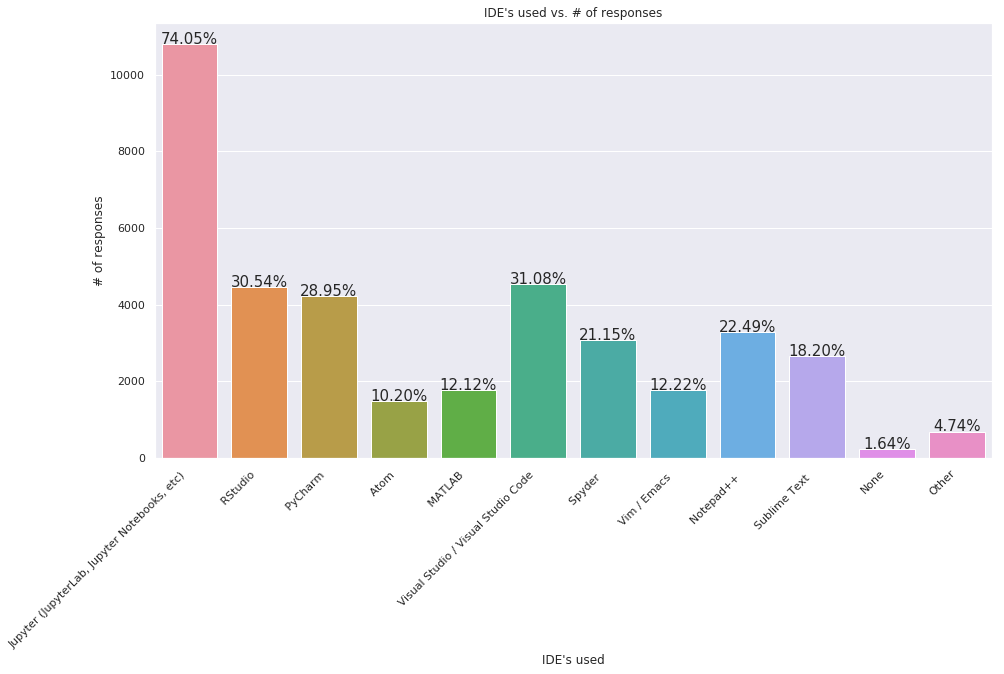

In [30]:
plot_multi_choice_dist('Q16', 12, 'IDE\'s used', '# of responses').show()

Most of the respondents uses Jupyter as an IDE.

### Distribution of usage of hosted notebook products

### Question 17: Which of the following hosted notebook products do you use on a regular basis? (Select all that apply)

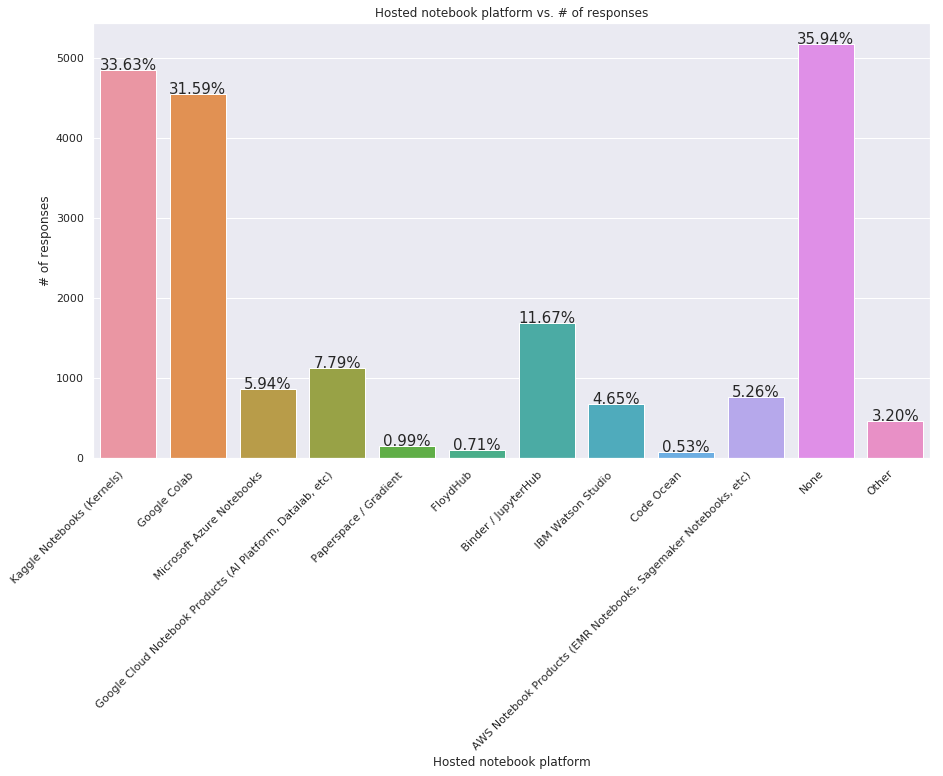

In [31]:
plot_multi_choice_dist('Q17', 12, 'Hosted notebook platform', '# of responses').show()

### Distribution of used programming languages

### Question 18: What programming languages do you use on a regular basis? (Select all that apply).

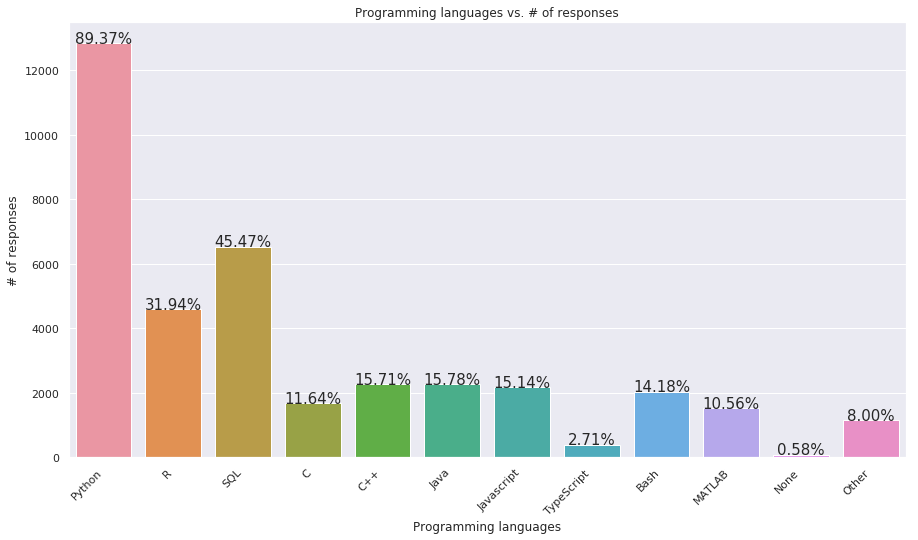

In [32]:
plot_multi_choice_dist('Q18', 12, 'Programming languages', '# of responses').show()

Python is most used language among data science aspirants

### Distribution of usage of visualization tools/libraries

### Question 20: What data visualization libraries or tools do you use on a regular basis? (Select all that apply).

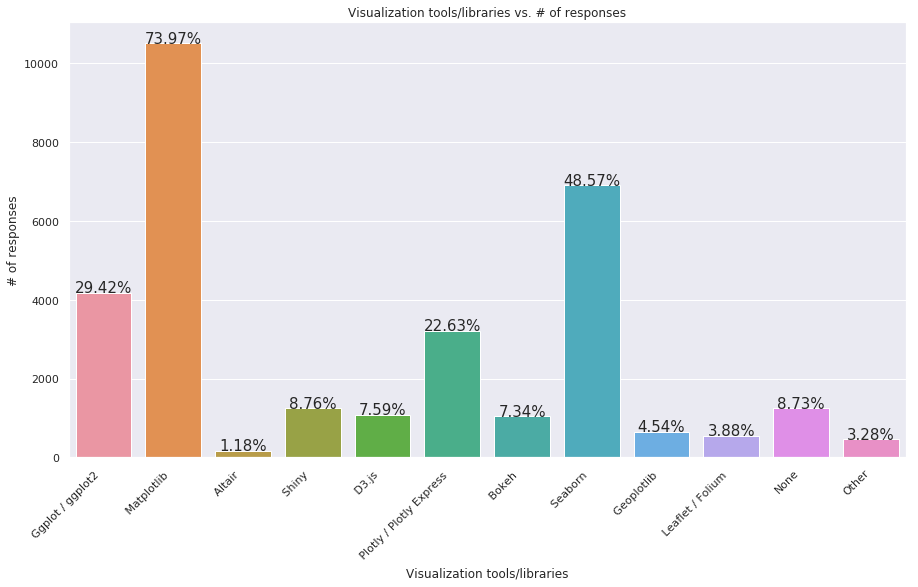

In [33]:
plot_multi_choice_dist('Q20', 12, 'Visualization tools/libraries', '# of responses').show()

Matplotlib used the most among the data science aspirants

### Distribution of usage of specialized hardware for ML/DS

### Question 21: Which types of specialized hardware do you use on a regular basis? (Select all that apply)

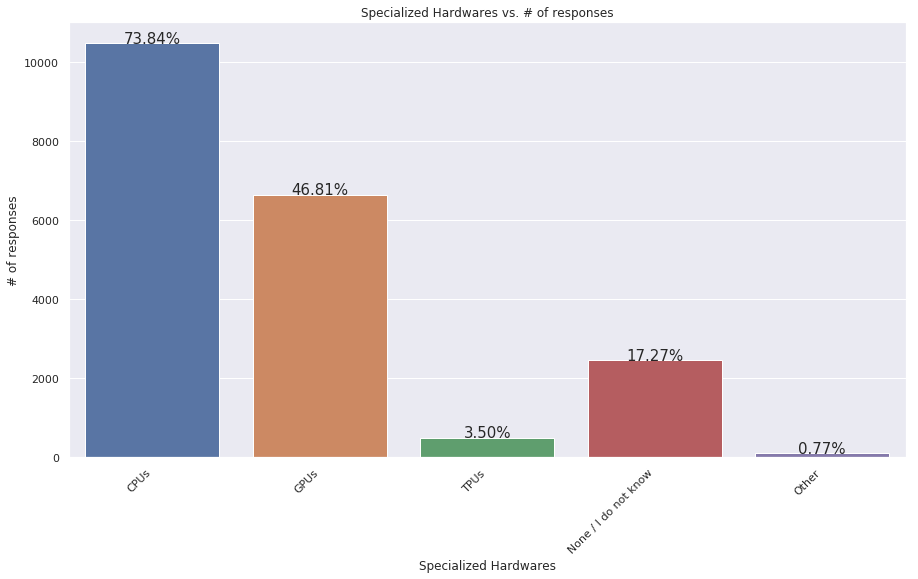

In [34]:
plot_multi_choice_dist('Q21', 5, 'Specialized Hardwares', '# of responses').show()

### Distribution of used ML algorithms

### Question 24: Which of the following ML algorithms do you use on a regular basis? (Select all that apply).

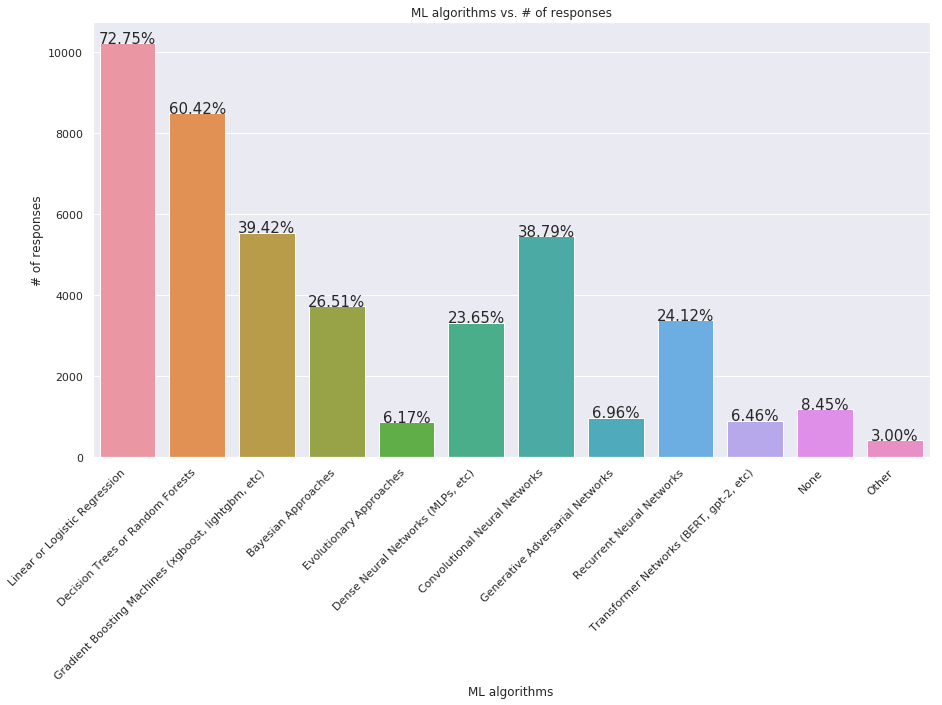

In [35]:
plot_multi_choice_dist('Q24', 12, 'ML algorithms', '# of responses').show()

### Distribution of used ML tools

### Question 25: Which categories of ML tools do you use on a regular basis? (Select all that apply)

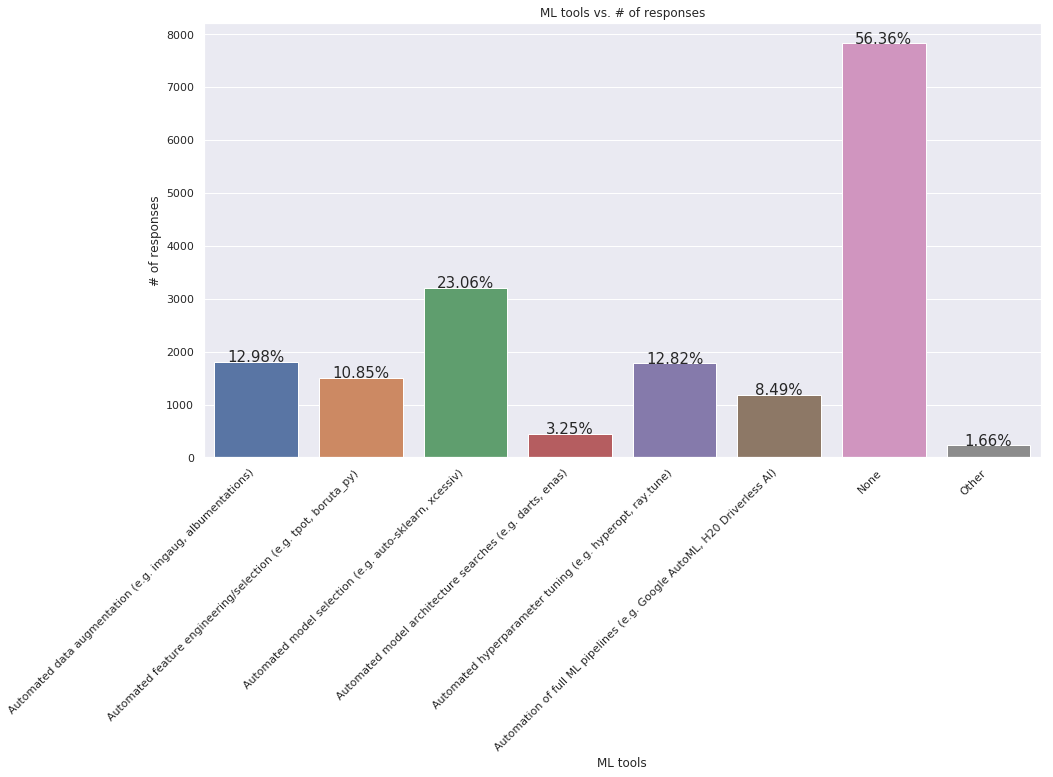

In [36]:
plot_multi_choice_dist('Q25', 8, 'ML tools', '# of responses').show()

### Distribution of computer vision methods used

### Question 26: Which categories of computer vision methods do you use on a regular basis? (Select all that apply).

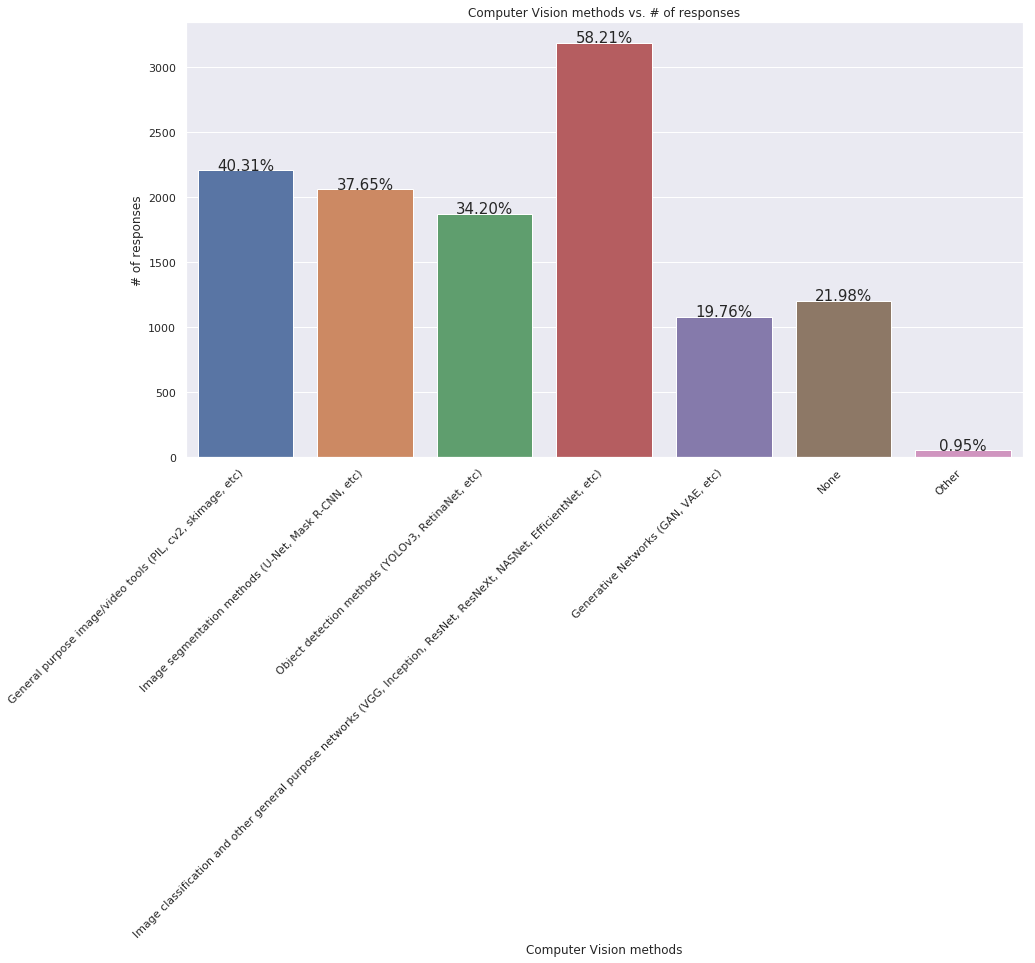

In [37]:
plot_multi_choice_dist('Q26', 7, 'Computer Vision methods', '# of responses').show()

### Distribution of NLP (Natural Language Processing) methods used

### Question 27: Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply)

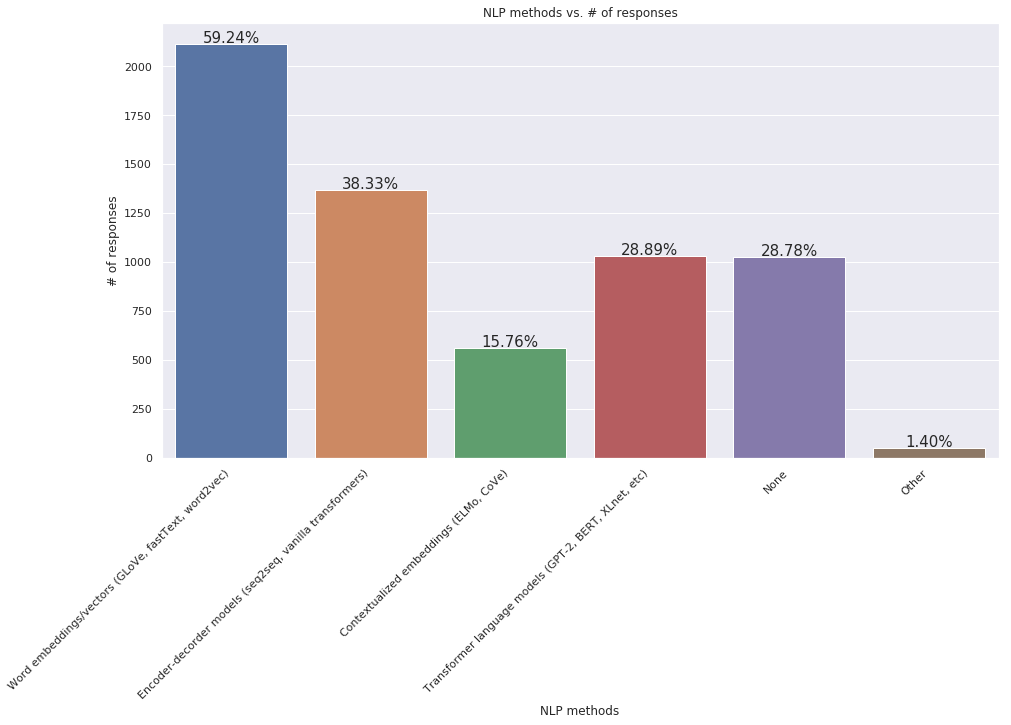

In [38]:
plot_multi_choice_dist('Q27', 6, 'NLP methods', '# of responses').show()

### Distribution of Machine Learning frameworks used

### Question 28: Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply).

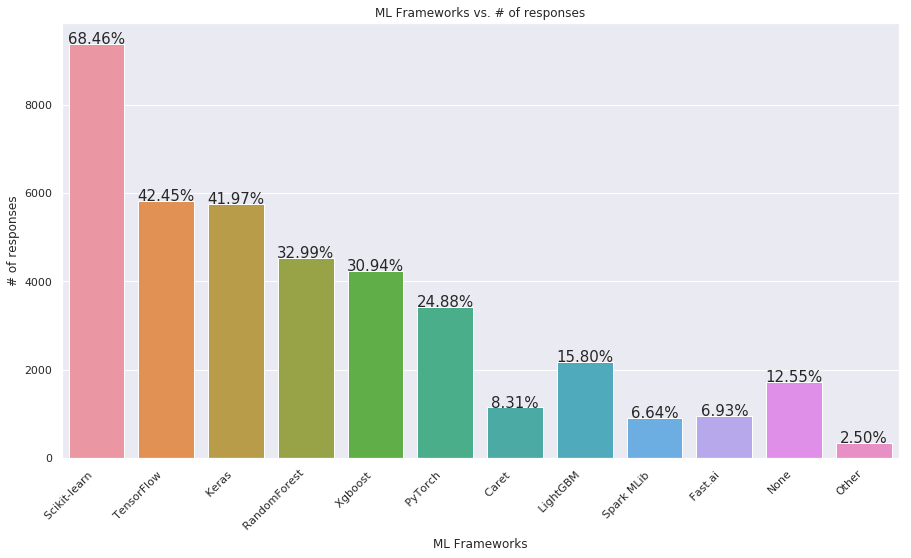

In [39]:
plot_multi_choice_dist('Q28', 12, 'ML Frameworks', '# of responses').show()

### Distribution of used Cloud Computing platforms

### Question 29: Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

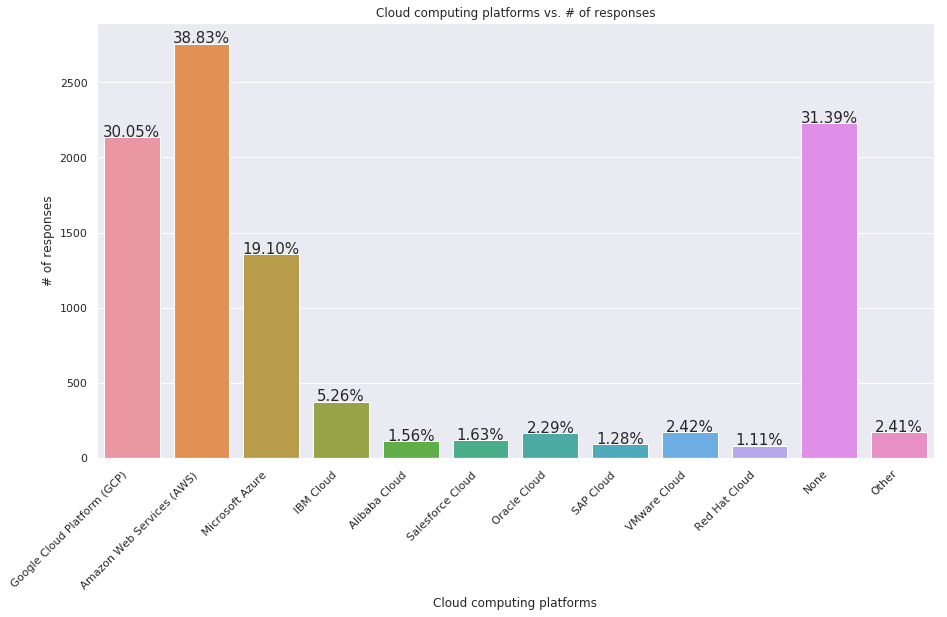

In [40]:
plot_multi_choice_dist('Q29', 12, 'Cloud computing platforms', '# of responses').show()

### Distribution of clouding computing products

### Question 30: Which specific cloud computing products do you use on a regular basis? (Select all that apply).

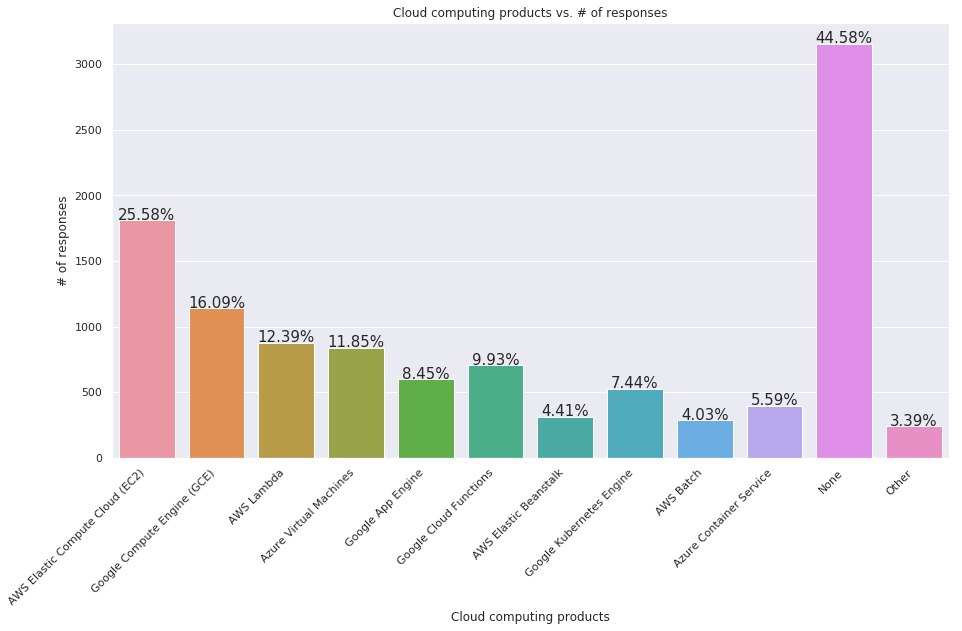

In [41]:
plot_multi_choice_dist('Q30', 12, 'Cloud computing products', '# of responses').show()

### Distribution of big data / analytics products used

### Question 31: Which specific big data / analytics products do you use on a regular basis? (Select all that apply)

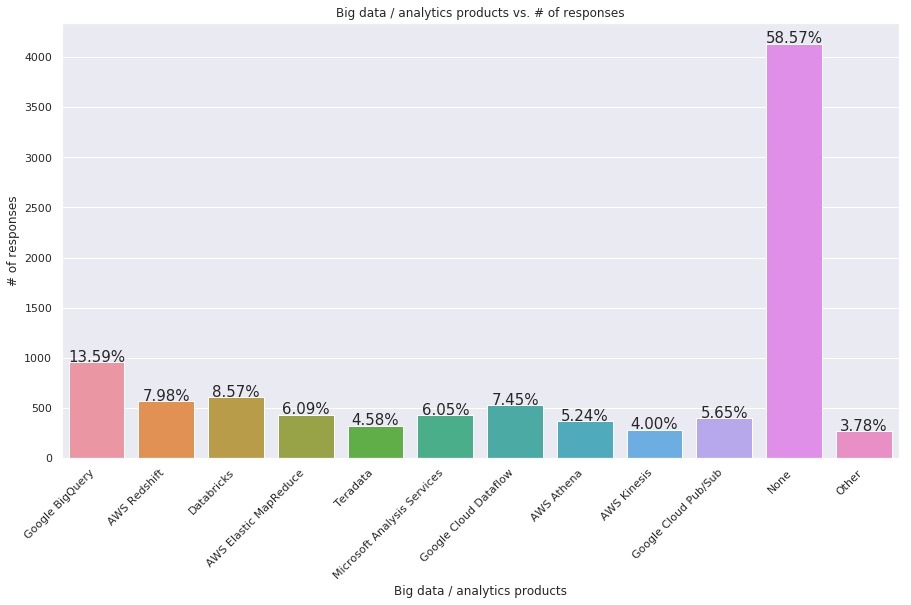

In [42]:
plot_multi_choice_dist('Q31', 12, 'Big data / analytics products', '# of responses').show()

### Destribution of used Machine Learning products

### Question 32: Which of the following machine learning products do you use on a regular basis? (Select all that apply).

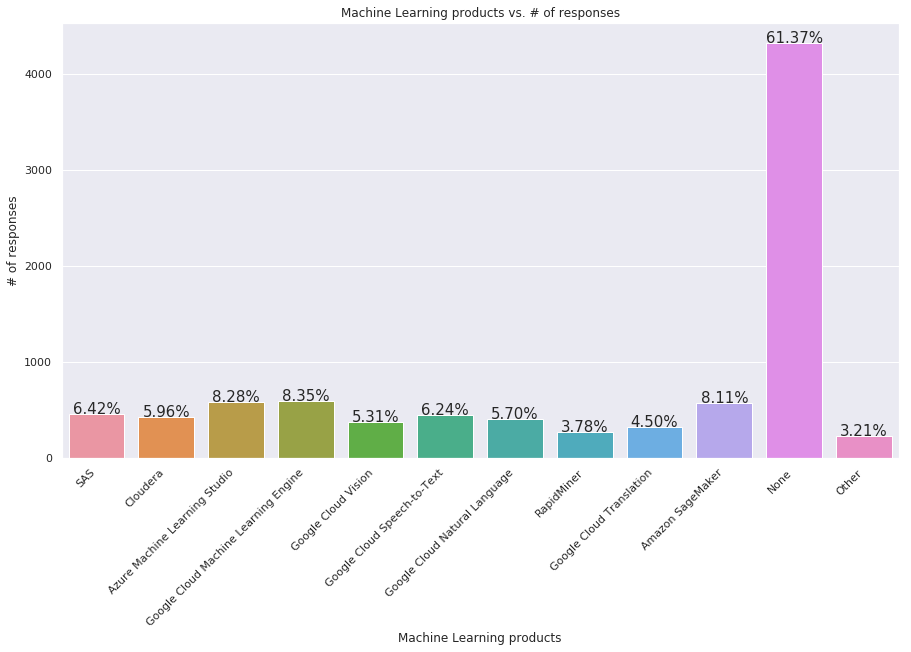

In [43]:
plot_multi_choice_dist('Q32', 12, 'Machine Learning products', '# of responses').show()

### Destribution of automated ML Tools used

### Question 33: Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) 

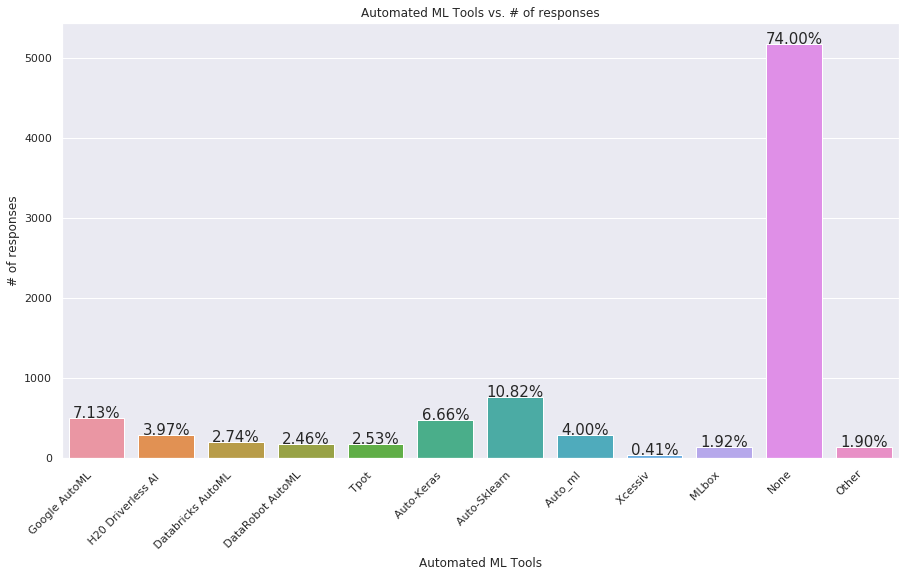

In [44]:
plot_multi_choice_dist('Q33', 12, 'Automated ML Tools', '# of responses').show()

### Destribution of relational database products used
### Question 34: Which of the following relational database products do you use on a regular basis? (Select all that apply).

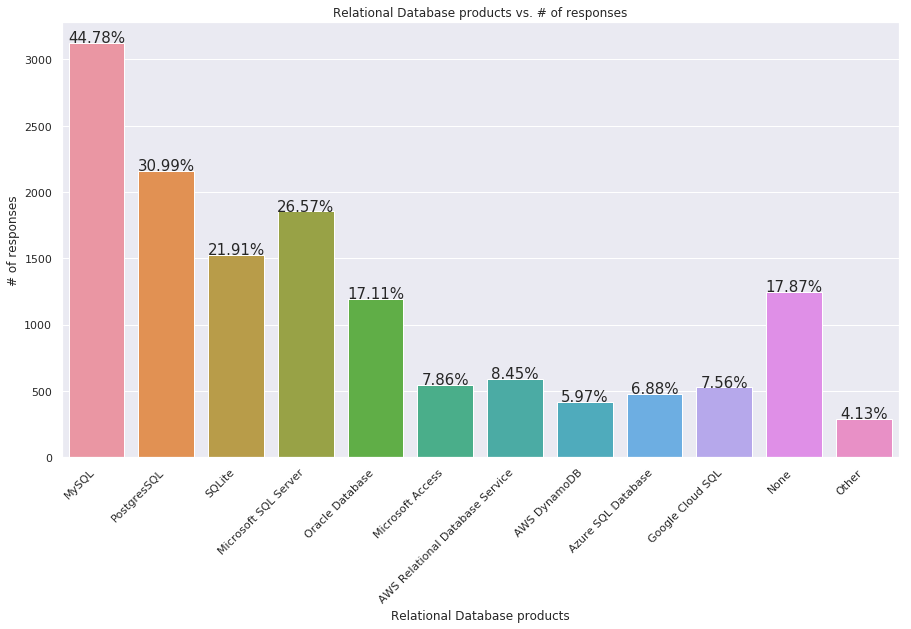

In [45]:
plot_multi_choice_dist('Q34', 12, 'Relational Database products', '# of responses').show()

## Your suggestions are appreciated. Let me know if I've missed anything. Thank you!